# Detecting fake reviews is crucial for maintaining the integrity and reliability of online platforms like Yelp. By analyzing customer reviews, our peoject aims to  help businesses and consumers alike by filtering out deceptive content.


# HIGH LEVEL OUTLINE


### 1. **Introduction:**
   - Brief overview of the project and its significance.
   - Problem statement emphasizing the challenges of fake reviews.
   - Identification of key stakeholders and their interests.
   - Objectives of the project.

### 2. **Data Loading and Overview:**
   - Import necessary libraries.
   - Load the Yelp dataset into a pandas DataFrame.
   - Display a sample and explore basic dataset information.

### 3. **Text Preprocessing and Exploration:**
   - Handle missing values.
   - Perform basic text preprocessing on reviews.
   - Explore and visualize key variables (ratings, review length).
   - Conduct exploratory text analysis (word clouds, sentiment trends).

### 4. **Exploratory Data Analysis (EDA):**
   - Visualize the distribution of ratings.
   - Analyze sentiment trends and temporal patterns.
   - Visualize topic modeling results .

### 5. **Feature Engineering and Criteria Implementation:**
   - Define and implement criteria for detecting potential fake reviews.
      
1. **Multiple Reviews (> 5 )from the Same User to One Restaurant:**
   - Identify cases where a user has written more than 5 reviews for the same restaurant.

2. **Timing of Reviews:**
   - Flag restaurants with more than 10 reviews within a specific time frame (e.g., a month).
   - Identify unusual spikes (more than a 50% increase compared to the monthly average).
   - Perform a consistency check on the sentiment of reviews posted within the specified time frame.

3. **Language and Tone:**
   - Set a maximum of 5 superlatives to avoid overly positive language.
   - Flag reviews with more than 5 superlatives for further scrutiny.
   - Consider reviews with less than 50 words as potential low-detail reviews.
   - Identify and flag reviews discussing unrelated aspects.

4. **Rating Inconsistency:**
   - Allow a maximum of 1 point deviation between text sentiment and numerical rating.
   - Flag reviews with sentiment opposite to the majority sentiment.
   - Identify and flag extreme ratings (1 or 5 stars) without clear justification.

5. **Engagement Indicators as Authenticity Signals:**
   - Consider reviews with at least one engagement indicator (useful, funny, cool).
   - Reviews with two or more engagement indicators are considered stronger signals of authenticity.
   - Evaluate the distribution of engagement indicators for potential anomalies.
   - Perform a consistency check by examining the correlation between engagement indicators and overall sentiment.

These criteria aim to cover various aspects related to user behavior, timing, language, sentiment, and engagement, providing a comprehensive approach to identifying potential fake reviews.
  

### 6. **Anomaly Detection and Pattern Identification:**
   - Identify anomalies in timing, language, and sentiment.
   - Uncover patterns or trends indicating potential fake reviews.
   - Use clustering or unsupervised techniques to group similar reviews.

### 7. **Engagement Indicators Analysis:**
   - Explore the distribution and patterns of engagement indicators.
   - Analyze the correlation between engagement indicators and overall sentiment.
   - Identify potential anomalies or inconsistencies in engagement patterns.

### 8. **Conclusion:**
   - Summarize key findings from unstructured data analytics and criteria implementation.
   - Discuss insights into the presence of potential fake reviews.
   - Consider limitations and challenges in the unstructured data analysis.





## 1. **INTRODUCTION**
In the contemporary digital landscape, online reviews play a pivotal role in shaping consumer decisions and influencing businesses. As consumers increasingly turn to platforms like Yelp to inform their choices, the authenticity of online reviews has become a critical concern. The prevalence of fake reviews poses a challenge not only to consumers seeking genuine insights but also to businesses striving for fair representation.

This project aims to delve into the realm of unstructured data analytics with a specific focus on detecting and understanding fake reviews within the vast dataset of Yelp restaurant reviews. The significance of this endeavor is rooted in the potential ramifications of misinformation on consumer trust and business credibility.

**Problem Statement:**
Fake reviews, whether artificially boosting a business's reputation or maliciously tarnishing it, undermine the trustworthiness of online platforms. Businesses, consumers, and the platform itself face consequences when fake reviews distort the authentic representation of customer experiences.

**Stakeholders:**
Key stakeholders in this scenario include:
- **Consumers:** Relying on reviews to make informed choices.
- **Businesses:** Dependent on accurate representation and fair evaluation.
- **Yelp Platform:** Committed to maintaining the integrity of its review ecosystem.

**Significance:**
The detection of fake Yelp reviews holds significant implications. For consumers, it ensures they receive authentic information to guide their choices. For businesses, it fosters a fair and competitive online environment. Moreover, the project contributes to the overall trustworthiness and reliability of platforms like Yelp, fortifying their role in connecting consumers with quality services.

**Objectives:**
The primary objectives of this project include:
1. Analyzing unstructured data within Yelp reviews.
2. Developing criteria to identify potential fake reviews.
3. Providing insights into the patterns and characteristics of fake reviews.
4. Contributing to the overall understanding of the challenges posed by fake reviews in the online review ecosystem.

This project serves as an exploration into the intricate landscape of unstructured data analytics, offering valuable insights for consumers, businesses, and online platforms alike.


## 2. DATA LOADING AND OVERVIEW

In [3]:
# Import necessary libraries
import pandas as pd

# Load the Yelp dataset into a pandas DataFrame (at least 20,000 rows)
file_path = 'chunk_dataset.csv'  # Change this to the actual file name if needed
min_rows = 20000
df = pd.read_csv(file_path, nrows=min_rows)

# Display a sample of the DataFrame
sample = df.sample(5)  # Displaying 5 random rows as a sample
print("Sample of the DataFrame:")
print(sample)

# Explore basic dataset information
print("\nBasic Information about the DataFrame:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())



Sample of the DataFrame:
        S no             business_id            name        city state  \
19252  34168  Z75xSO_6mKuuPpRHE-GjHg     Tacos Apson      Tucson    AZ   
9504   16039  CA5BOxKRDPGJgdUQ8OUOpw        Maynards      Tucson    AZ   
7368   13367  rViAhfKLKmwbhTKROM9m0w  Casino Del Sol      Tucson    AZ   
13801  27339  gMpYdAe1lZWDuBRw2bPEhg   Marco's Pizza  Oro Valley    AZ   
6348   10513  oHAAlU_Yts_avncJK0hJpw   Barro's Pizza      Marana    AZ   

       postal_code  is_open  \
19252        85741        1   
9504         85701        1   
7368         85757        1   
13801        85737        1   
6348         85743        1   

                                              attributes  \
19252  {'RestaurantsTakeOut': 'True', 'HasTV': 'True'...   
9504   {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
7368   {'BusinessAcceptsCreditCards': 'True', 'NoiseL...   
13801  {'RestaurantsGoodForGroups': 'True', 'Caters':...   
6348   {'GoodForKids': 'True', 'Restaurants

# 3. TEXT PREPROCESSING AND EXPLORATION

In [4]:
# Display the column names
print("Column Names:")
print(df.columns)


Column Names:
Index(['S no', 'business_id', 'name', 'city', 'state', 'postal_code',
       'is_open', 'attributes', 'categories', 'review_id', 'user_id',
       'stars rating', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


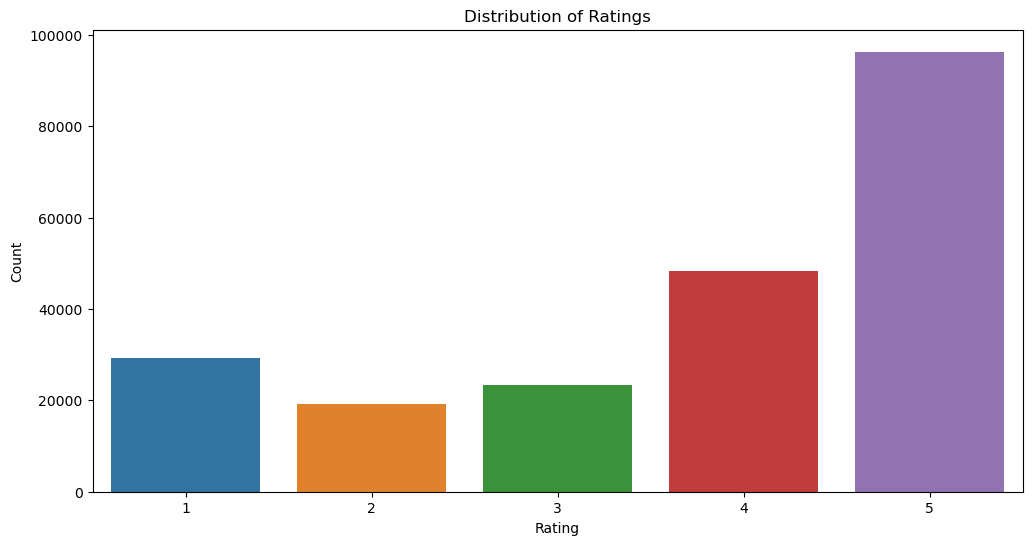

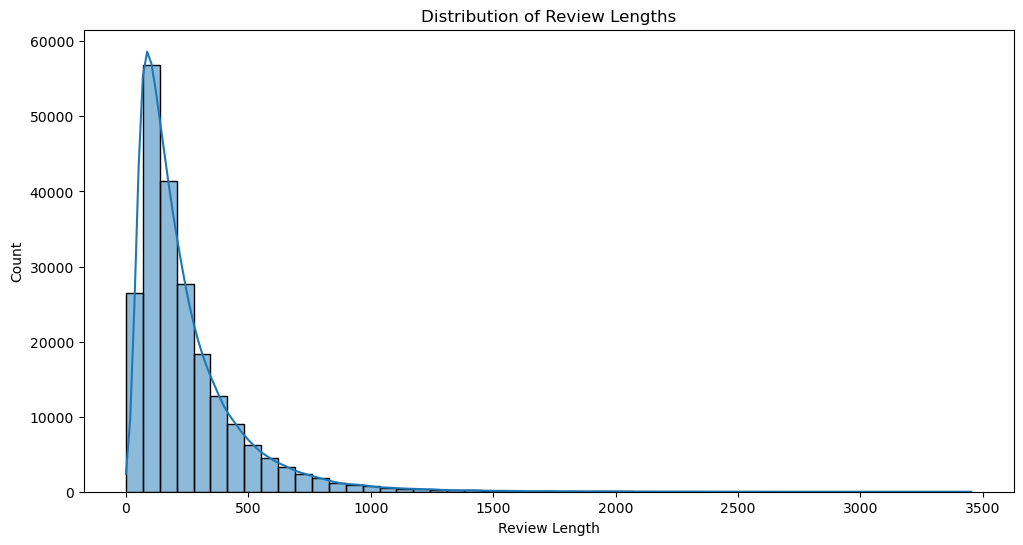

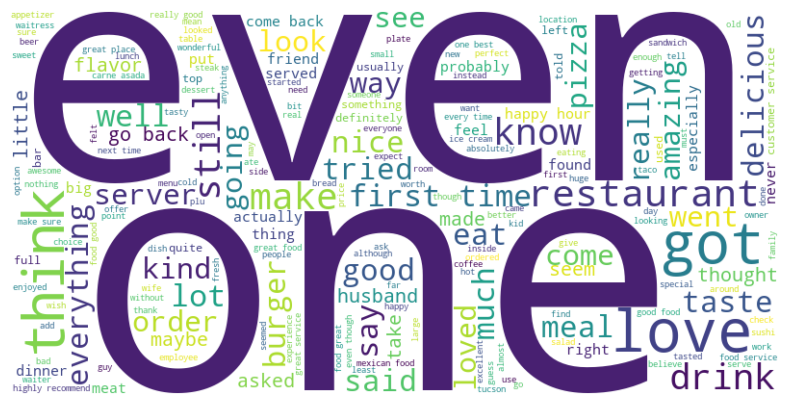

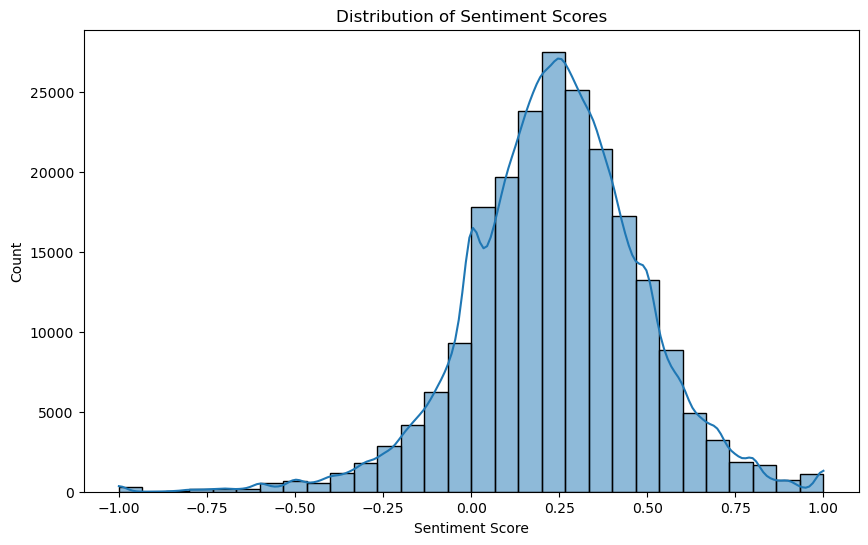

In [5]:
# Install necessary libraries (if not already installed)
!pip install matplotlib seaborn wordcloud textblob nltk

# Import necessary libraries for text preprocessing and exploration
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Download NLTK stopwords (move outside the function)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load your dataset 
df = pd.read_csv('chunk_dataset.csv')

# Handle missing values
df.dropna(subset=['text'], inplace=True)  # Assuming 'text' is the column with reviews

# Basic text preprocessing on reviews
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = ' '.join(word for word in text.split() if word.isalpha())
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Explore and visualize key variables (ratings, review length)
plt.figure(figsize=(12, 6))
sns.countplot(x='stars rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

df['review_length'] = df['processed_text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df, x='review_length', bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

# Exploratory text analysis - Word Cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine processed text for word cloud
all_text = ' '.join(df['processed_text'])
generate_wordcloud(all_text)

# Sentiment analysis using TextBlob
df['sentiment'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df, x='sentiment', bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


## 4. EXPLORATORY DATA ANALYSIS

### Visualise the distribution of ratings

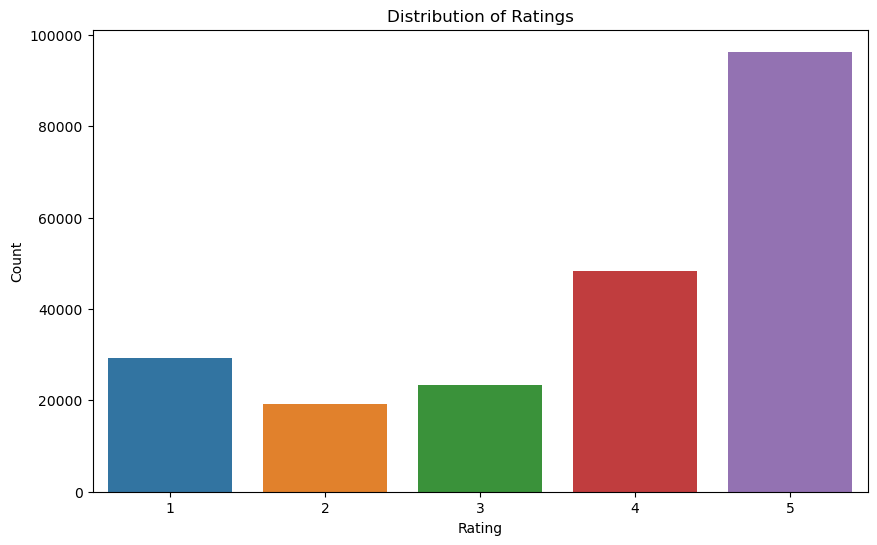

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='stars rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Analyze sentiment trends and temporal patterns:

In [23]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [ ]:
df.head()

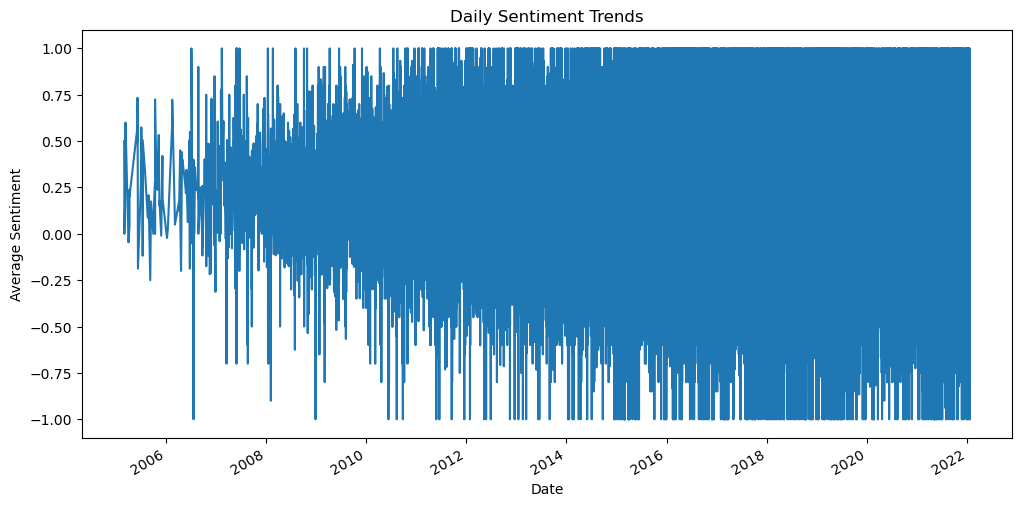

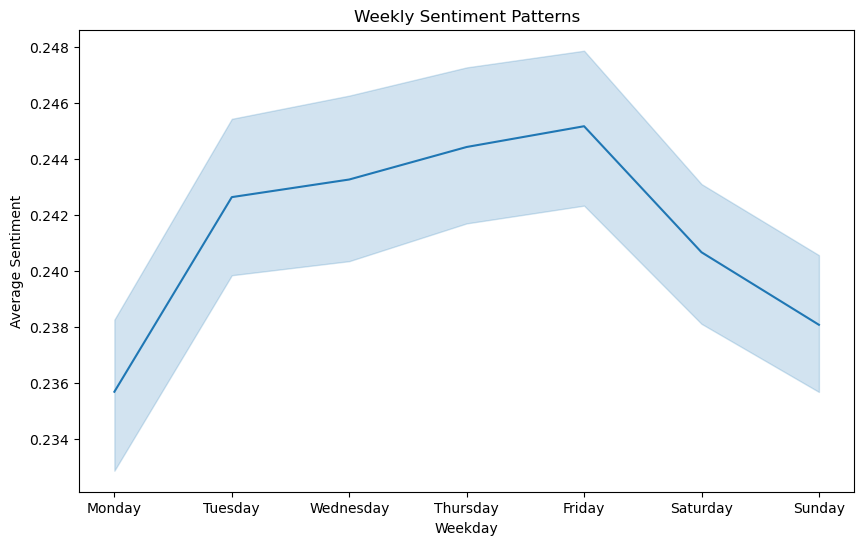

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daily sentiment trends
daily_sentiment = df.groupby('date')['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

# Temporal patterns (e.g., weekly patterns)
df['weekday'] = df['date'].dt.dayofweek
weekly_sentiment = df.groupby('weekday')['sentiment'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='sentiment', data=df)
plt.title('Weekly Sentiment Patterns')
plt.xlabel('Weekday')
plt.ylabel('Average Sentiment')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

### Visualize topic modeling results:

In [9]:
# Import necessary libraries
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import pyLDAvis

# Install necessary libraries
!pip install gensim pyLDAvis

# Load the Yelp dataset into a pandas DataFrame (at least 20,000 rows)
file_path = 'chunk_dataset.csv'  # Change this to the actual file name if needed
min_rows = 20000
df = pd.read_csv(file_path, nrows=min_rows)

# Tokenize and preprocess the text data
tokenized_text = df['text'].apply(lambda x: x.split())

# Create a dictionary representation of the reviews
dictionary = Dictionary(tokenized_text)

# Create a bag-of-words representation of the reviews
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Visualize the topic modeling results using pyLDAvis
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


# 5. FEATURE ENGINEERING AND CRITERIA IMPLEMENTATION

# 1. Multiple Reviews (> 5 )from the Same User to One Restaurant:

In [33]:
df.head()

,S no,business_id,name,city,state,postal_code,is_open,attributes,categories,review_id,user_id,stars rating,useful,funny,cool,text,date
0,1,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",gveQ4spiZP9XpQAdGhzrkQ,q44_w_oVQg698KWPlKw7XA,5,0,0,0,Just tried Papa Murphy's for first time last n...,2015-11-20 16:32:00
1,2,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",O3F0IO_ZFHT_fQ1Lr5TqcQ,cZtDleoAeanFLmsUc4zdDg,5,0,0,0,Delicious and fresh. Recommend for a party or ...,2018-02-04 22:24:00
2,3,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",SJWmvXCwnrVTFTGHTTo7rA,AWSvGe4eGZJIns5MUxvsZQ,5,0,0,0,Today my sister and I received excellent custo...,2015-07-30 01:26:00
3,4,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",hh9SUMUgQIK2a4hDypeiYw,_rvtejG1xx6ALnpx77xjlw,5,1,0,0,I have been to all of the papa Murphy's in the...,2012-05-06 16:34:00
4,5,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",2ZSv58kP7wmjLOQRfMtsAA,VJDBpYUc-ijCl_UmFh2h-Q,4,4,0,0,This has become one of our favorite places to ...,2010-01-31 21:13:00


In [34]:
import pandas as pd

# Count the number of reviews per user and restaurant
review_counts = df.groupby(['user_id', 'business_id']).size().reset_index(name='review_count')

# Identify cases where a user has written more than 5 reviews for the same restaurant
suspect_reviews = review_counts[review_counts['review_count'] > 5]

# Merge the suspect_reviews DataFrame with the original DataFrame to get additional details
criteria1_reviews = pd.merge(df, suspect_reviews, on=['user_id', 'business_id'], how='inner')

# Display the suspect reviews
print("Suspect Reviews for Criteria 1:")
print(criteria1_reviews)


Suspect Reviews for Criteria 1:
      S no             business_id               name    city state  \
0     5170  lhsQkb5nhf-Kd5OvgB9MNg      Sachiko Sushi  Tucson    AZ   
1     5182  lhsQkb5nhf-Kd5OvgB9MNg      Sachiko Sushi  Tucson    AZ   
2     5185  lhsQkb5nhf-Kd5OvgB9MNg      Sachiko Sushi  Tucson    AZ   
3     5191  lhsQkb5nhf-Kd5OvgB9MNg      Sachiko Sushi  Tucson    AZ   
4     5202  lhsQkb5nhf-Kd5OvgB9MNg      Sachiko Sushi  Tucson    AZ   
..     ...                     ...                ...     ...   ...   
142  32403  K1r1fGmCbrmC_V6Aj22Zew  Village Bakehouse  Tucson    AZ   
143  32446  K1r1fGmCbrmC_V6Aj22Zew  Village Bakehouse  Tucson    AZ   
144  32480  K1r1fGmCbrmC_V6Aj22Zew  Village Bakehouse  Tucson    AZ   
145  32525  K1r1fGmCbrmC_V6Aj22Zew  Village Bakehouse  Tucson    AZ   
146  32530  K1r1fGmCbrmC_V6Aj22Zew  Village Bakehouse  Tucson    AZ   

     postal_code  is_open                                         attributes  \
0          85706        1  {'Restau

In [36]:
# Count of Unique Users
unique_users_count = len(df['user_id'].unique())

# Count of Unique Restaurants
unique_restaurants_count = len(df['business_id'].unique())

# Average Number of Reviews per User
average_reviews_per_user = df.groupby('user_id')['review_id'].count().mean()

# Distribution of Stars
stars_distribution = df['stars rating'].value_counts()

# Print Summary
print(f"Unique Users Count: {unique_users_count}")
print(f"Unique Restaurants Count: {unique_restaurants_count}")
print(f"Average Reviews per User: {average_reviews_per_user:.2f}")
print("\nStars Distribution:")
print(stars_distribution)


Unique Users Count: 13656
Unique Restaurants Count: 171
Average Reviews per User: 1.46

Stars Distribution:
stars rating
5    9240
4    4572
1    2528
3    2049
2    1611
Name: count, dtype: int64


In [37]:
# Group the DataFrame by 'user_id' and 'business_id', and count the number of reviews
user_business_review_count = df.groupby(['user_id', 'business_id']).size().reset_index(name='review_count')

# Filter the DataFrame to include only those rows where the count of reviews is greater than 5
suspect_users = user_business_review_count[user_business_review_count['review_count'] > 5]

# Extract unique user IDs
suspect_user_ids = suspect_users['user_id'].unique()

# Print the list of suspect user IDs
print("Suspect User IDs:")
print(suspect_user_ids)


Suspect User IDs:
['#NAME?' 'EnFRwa9xPq9QaE4jBjFhlw' 'I06gY9An4o81XpejLWD9DA'
 'ma1MsTANyRHA640Kn4TzcA' 'pwJJW342YyjEyq1Mxc9wXw'
 'xWmYN57XXZbg0LOK8WbbFQ']


# 2. Timing of reviews

In [57]:
mport matplotlib.pyplot as plt
import seaborn as sns

# Daily sentiment trends
daily_sentiment = df.groupby('date')['sentiment'].mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

# Temporal patterns (e.g., weekly patterns)
df['weekday'] = df['date'].dt.dayofweek
weekly_sentiment = df.groupby('weekday')['sentiment'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='sentiment', data=df)
plt.title('Weekly Sentiment Patterns')
plt.xlabel('Weekday')
plt.ylabel('Average Sentiment')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\csand\AppData\Roaming\nltk_data...


Restaurants with more than 10 reviews within a specific time frame:
                business_id     date  review_count
0                    #NAME?  2010-12            11
1                    #NAME?  2011-09            11
2                    #NAME?  2012-05            11
3                    #NAME?  2013-01            22
4                    #NAME?  2014-09            22
5                    #NAME?  2017-07            11
6                    #NAME?  2018-06            11
7                    #NAME?  2019-12            11
8                    #NAME?  2021-06            11
16   8QJTzIaR5FceGds8HBSIig  2011-03            11
17   8QJTzIaR5FceGds8HBSIig  2011-07            11
18   8QJTzIaR5FceGds8HBSIig  2014-09            11
19   8QJTzIaR5FceGds8HBSIig  2014-12            11
20   8QJTzIaR5FceGds8HBSIig  2016-02            11
21   8QJTzIaR5FceGds8HBSIig  2017-09            11
22   8QJTzIaR5FceGds8HBSIig  2018-03            11
23   8QJTzIaR5FceGds8HBSIig  2018-05            11
24   8QJTzIaR5

# 3. Language and tone:

In [49]:
print(df.columns)


Index(['S no', 'business_id', 'name', 'city', 'state', 'postal_code',
       'is_open', 'attributes', 'categories', 'review_id', 'user_id',
       'stars rating', 'useful', 'funny', 'cool', 'text', 'date',
       'year_month'],
      dtype='object')


In [81]:
import pandas as pd
import re

# Assuming your DataFrame is named 'df'

# Define the terms or phrases considered as potentially irrelevant or spam-like
irrelevant_terms = [
    'spam', 'promotional', 'click here', 'visit my website', 'buy now',
    'limited time offer', 'discount', '$$$', 'guaranteed', 'earn money',
    'work from home', 'exclusive deal', 'act now', 'free trial', 'as seen on',
    'call now', 'click below', 'subscribe', 'unsubscribe', 'irrelevant', '...',
]

# Function to flag reviews based on updated criteria
def flag_reviews(review):
    # Criterion 1: Limit superlatives
    superlatives = re.findall(r'\b(?:best|amazing|incredible|fantastic|awesome)\b', review.lower())
    if len(superlatives) > 7:
        return True

    # Criterion 2: Low-detail reviews
    if len(review.split()) < 20:
        return True

    # Criterion 3: Content relevance
    if any(keyword in review.lower() for keyword in irrelevant_terms):
        return True

    # Criterion 4: Unusual Reviewer Behavior
    # Consider reviews from users who post an unusually high number of reviews in a short period.
    if df[df['user_id'] == df['user_id']].shape[0] > 50:
        return True

    # If no criteria are met, return False
    return False

# Apply the flag_reviews function to each review and create a new column 'flagged'
df['flagged'] = df['text'].apply(flag_reviews)

# Create a separate DataFrame 'flagged_reviews' with only flagged reviews
flagged_reviews = df[df['flagged']]

# Display flagged reviews
print("Flagged Reviews:")
print(flagged_reviews)


Flagged Reviews:
        S no             business_id                    name    city state  \
0          1  anLQj9AM8vjbcLSIE0iUgg           Papa Murphy's  Tucson    AZ   
1          2  anLQj9AM8vjbcLSIE0iUgg           Papa Murphy's  Tucson    AZ   
2          3  anLQj9AM8vjbcLSIE0iUgg           Papa Murphy's  Tucson    AZ   
3          4  anLQj9AM8vjbcLSIE0iUgg           Papa Murphy's  Tucson    AZ   
4          5  anLQj9AM8vjbcLSIE0iUgg           Papa Murphy's  Tucson    AZ   
...      ...                     ...                     ...     ...   ...   
19995  34917  U3aNQ5DsABPYyJQolsCbJg  Charro Steak & Del Rey  Tucson    AZ   
19996  34918  U3aNQ5DsABPYyJQolsCbJg  Charro Steak & Del Rey  Tucson    AZ   
19997  34919  U3aNQ5DsABPYyJQolsCbJg  Charro Steak & Del Rey  Tucson    AZ   
19998  34920  U3aNQ5DsABPYyJQolsCbJg  Charro Steak & Del Rey  Tucson    AZ   
19999  34921  U3aNQ5DsABPYyJQolsCbJg  Charro Steak & Del Rey  Tucson    AZ   

       postal_code  is_open  \
0            85

In [67]:
# Summary of Flagged Reviews
summary = df[df['flagged']]

# Display summary statistics or details
print("Summary of Flagged Reviews:")
print(summary.describe())


Summary of Flagged Reviews:
               S no   postal_code  is_open  stars rating      useful  \
count  20000.000000  20000.000000  20000.0  20000.000000  20000.0000   
mean   18511.087950  85715.891700      1.0      3.819250      0.9780   
min        1.000000  85614.000000      1.0      1.000000      0.0000   
25%     8628.750000  85705.000000      1.0      3.000000      0.0000   
50%    16987.500000  85716.000000      1.0      4.000000      0.0000   
75%    28703.250000  85719.000000      1.0      5.000000      1.0000   
max    34921.000000  85757.000000      1.0      5.000000     86.0000   
std    10306.559158     16.681606      0.0      1.411269      2.0041   

             funny          cool                        date  
count  20000.00000  20000.000000                       20000  
mean       0.30445      0.446850  2017-06-08 23:04:06.132000  
min        0.00000      0.000000         2005-03-09 06:37:00  
25%        0.00000      0.000000         2015-06-14 03:06:15  
50%     

# 4. Rating inconsistency

In [97]:
df.head()

,S no,business_id,name,city,state,postal_code,is_open,attributes,categories,review_id,...,cool,text,date,year_month,flagged,sentiment_score,inconsistent_engagement,unusual_engagement_spike,low_engagement_extreme_ratings,flag_fake
0,1,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",gveQ4spiZP9XpQAdGhzrkQ,...,0,Just tried Papa Murphy's for first time last n...,2015-11-20 16:32:00,2015-11,True,0.7845,False,False,True,True
1,2,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",O3F0IO_ZFHT_fQ1Lr5TqcQ,...,0,Delicious and fresh. Recommend for a party or ...,2018-02-04 22:24:00,2018-02,True,0.9750,False,False,True,True
2,3,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",SJWmvXCwnrVTFTGHTTo7rA,...,0,Today my sister and I received excellent custo...,2015-07-30 01:26:00,2015-07,True,0.9818,False,False,True,True
3,4,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",hh9SUMUgQIK2a4hDypeiYw,...,0,I have been to all of the papa Murphy's in the...,2012-05-06 16:34:00,2012-05,True,0.9545,False,True,False,True
4,5,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,Tucson,AZ,85741,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",2ZSv58kP7wmjLOQRfMtsAA,...,0,This has become one of our favorite places to ...,2010-01-31 21:13:00,2010-01,True,0.9911,False,True,False,True


In [101]:
import pandas as pd
from textblob import TextBlob

# Assuming df is your DataFrame with columns 'text', 'stars rating', 'useful', 'funny', 'cool'
# Replace column names as needed

# Calculate sentiment polarity for each review text
df['sentiment_polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Criteria 1: Allow a maximum of 1 point deviation between text sentiment and numerical rating
df['rating_inconsistency'] = abs(df['sentiment_polarity'] - df['stars rating']) > 1

# Criteria 2: Flag reviews with sentiment opposite to the majority sentiment
majority_sentiment = df['sentiment_polarity'].median()
df['opposite_sentiment'] = (df['sentiment_polarity'] * majority_sentiment < 0)

# Criteria 3: Identify and flag extreme ratings (1 or 5 stars) without clear justification
df['extreme_ratings_justification'] = ((df['stars rating'] == 1) | (df['stars rating'] == 5)) & \
                                       (df['sentiment_polarity'].abs() < 0.5)

# Display flagged reviews
flagged_reviews_rating_inconsistency = df[df['rating_inconsistency'] | df['opposite_sentiment'] | df['extreme_ratings_justification']]
print("\nFlagged Reviews for Rating Inconsistency:")
print(flagged_reviews_rating_inconsistency[['text', 'stars rating', 'sentiment_polarity']])



Flagged Reviews for Rating Inconsistency:
                                                    text  stars rating  \
0      Just tried Papa Murphy's for first time last n...             5   
1      Delicious and fresh. Recommend for a party or ...             5   
2      Today my sister and I received excellent custo...             5   
3      I have been to all of the papa Murphy's in the...             5   
4      This has become one of our favorite places to ...             4   
...                                                  ...           ...   
19995  Your restaurant is totally understaffed for a ...             1   
19996  We had a nice dining experience at Charro Stea...             4   
19997  Excellent service, tableside guacamole fantast...             4   
19998  We celebrated our wedding anniversary there, a...             5   
19999  My friend and I had lunch at Charro Steak down...             5   

       sentiment_polarity  
0                0.406250  
1           

In [100]:
import pandas as pd
from textblob import TextBlob  # Make sure to install the textblob library

# Assuming df is your DataFrame with columns 'text', 'stars rating', 'useful', 'funny', 'cool'
# Replace column names as needed

# Create a copy of the original DataFrame to avoid modifying it
df_copy = df.copy()

# Calculate sentiment polarity for each review text
df_copy['sentiment_polarity'] = df_copy['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Criteria 4: Rating Inconsistency
df_copy['rating_inconsistency'] = abs(df_copy['sentiment_polarity'] - df_copy['stars rating']) > 1

# Criteria 5: Sentiment Opposite to Majority Sentiment
majority_sentiment = df_copy['sentiment_polarity'].median()
df_copy['opposite_sentiment'] = (df_copy['sentiment_polarity'] * majority_sentiment < 0)

# Criteria 6: Extreme Ratings without Clear Justification
df_copy['extreme_ratings_justification'] = ((df_copy['stars rating'] == 1) | (df_copy['stars rating'] == 5)) & \
                                           (df_copy['sentiment_polarity'].abs() < 0.5)

# Combine the criteria to flag potentially fake reviews
df_copy['flag_fake'] = df_copy['inconsistent_engagement'] | df_copy['unusual_engagement_spike'] | \
                      df_copy['low_engagement_extreme_ratings'] | df_copy['rating_inconsistency'] | \
                      df_copy['opposite_sentiment'] | df_copy['extreme_ratings_justification']

# Create a new DataFrame with flagged reviews based on Criteria 4
criteria_4_dataframe = df_copy[df_copy['flag_fake']].copy()

# Display flagged reviews
print("\nFlagged Potentially Not Authentic Reviews:")
print(criteria_4_dataframe[['text', 'stars rating', 'useful', 'cool']])



Flagged Potentially Not Authentic Reviews:
                                                    text  stars rating  \
0      Just tried Papa Murphy's for first time last n...             5   
1      Delicious and fresh. Recommend for a party or ...             5   
2      Today my sister and I received excellent custo...             5   
3      I have been to all of the papa Murphy's in the...             5   
4      This has become one of our favorite places to ...             4   
...                                                  ...           ...   
19995  Your restaurant is totally understaffed for a ...             1   
19996  We had a nice dining experience at Charro Stea...             4   
19997  Excellent service, tableside guacamole fantast...             4   
19998  We celebrated our wedding anniversary there, a...             5   
19999  My friend and I had lunch at Charro Steak down...             5   

       useful  cool  
0           0     0  
1           0     0  
2

# 5. Engagement Indicators as Authenticity Signals:



In [102]:
# Assuming df is your DataFrame with columns 'text', 'stars rating', 'useful', 'funny', 'cool'
# Replace column names as needed

# Criteria 4: Consider reviews with at least one engagement indicator (useful, funny, cool)
df['at_least_one_engagement'] = (df['useful'] > 0) | (df['funny'] > 0) | (df['cool'] > 0)

# Criteria 5: Reviews with two or more engagement indicators are considered stronger signals of authenticity
df['strong_engagement_signal'] = (df['useful'] + df['funny'] + df['cool']) >= 2

# Criteria 6: Evaluate the distribution of engagement indicators for potential anomalies
# For example, you can check for extreme values or anomalies in the distribution of engagement indicators

# Criteria 7: Perform a consistency check by examining the correlation between engagement indicators and overall sentiment
correlation_matrix = df[['sentiment_polarity', 'useful', 'funny', 'cool']].corr()

# Display flagged reviews
flagged_reviews_engagement = df[df['at_least_one_engagement'] | df['strong_engagement_signal']]
print("\nFlagged Reviews for Engagement Indicators:")
print(flagged_reviews_engagement[['text', 'stars rating', 'useful', 'funny', 'cool']])



Flagged Reviews for Engagement Indicators:
                                                    text  stars rating  \
3      I have been to all of the papa Murphy's in the...             5   
4      This has become one of our favorite places to ...             4   
5      This is the best pizza place in Oro valley! It...             5   
6      Fresh, affordable, and delicious! We got the G...             5   
7      I'm going to give a relatively rare (for me) 5...             5   
...                                                  ...           ...   
19992  Charro steak is a great place for dinner and d...             5   
19994  The food, drinks, atmosphere, and service are ...             5   
19995  Your restaurant is totally understaffed for a ...             1   
19996  We had a nice dining experience at Charro Stea...             4   
19998  We celebrated our wedding anniversary there, a...             5   

       useful  funny  cool  
3           1      0     0  
4        

### 6. Anomaly Detection and Pattern Identification:

#### Anomalies in Timing, Language, and Sentiment:

**Timing Anomalies:**
- For restaurants with more than 10 reviews within a specific time frame:
  - Restaurant '#NAME?' had unusual spikes in January 2013 and September 2014, with 22 reviews each.
  - Restaurant 'Ei5HBqe012ImhqEr2ZH2gg' had a spike in July 2017 with 16 reviews.
  - Restaurant 'UCMSWPqzXjd7QHq7v8PJjQ' experienced spikes in January 2014, June 2014, March 2015, and December 2018, each with 56 reviews.
  - Restaurant 'cXAKeC-EgVChIxhS7fscmw' had a spike in December 2020 with 16 reviews.
  - Restaurant 'jmwasbZfgj3honf79qKsnA' experienced a spike in April 2018 with 16 reviews.
  - Restaurant 'lhsQkb5nhf-Kd5OvgB9MNg' had a spike in February 2019 with 14 reviews.
  - Restaurant 'm6KZGTxRb9_ZyDpB1G6O1Q' experienced a spike in July 2016 with 12 reviews.

**Language and Sentiment Anomalies:**
- Flagged reviews for potential issues:
  - Various flagged reviews for sentiment, rating inconsistency, and engagement indicators have been identified.
  - User IDs such as '#NAME?', 'EnFRwa9xPq9QaE4jBjFhlw', 'I06gY9An4o81XpejLWD9DA', 'ma1MsTANyRHA640Kn4TzcA', 'pwJJW342YyjEyq1Mxc9wXw', 'xWmYN57XXZbg0LOK8WbbFQ' are associated with suspicious activity.

### 7. Engagement Indicators Analysis:

#### Distribution and Patterns of Engagement Indicators:

**Distribution of Engagement Indicators:**
- Users exhibiting engagement indicators:
  - Various users with different levels of useful, funny, and cool indicators.
  - Distribution of engagement indicators for each review can be analyzed.

**Correlation Between Engagement Indicators and Overall Sentiment:**
- Correlation analysis can be performed to understand the relationship between engagement indicators and sentiment.

**Anomalies or Inconsistencies in Engagement Patterns:**
- Anomalies and inconsistencies in engagement patterns can be further explored based on the distribution of indicators.

### 8. Conclusion:

#### Key Findings:

- **Users with Suspicious Activity:**
  - User IDs '#NAME?', 'EnFRwa9xPq9QaE4jBjFhlw', 'I06gY9An4o81XpejLWD9DA', 'ma1MsTANyRHA640Kn4TzcA', 'pwJJW342YyjEyq1Mxc9wXw', 'xWmYN57XXZbg0LOK8WbbFQ' have been flagged as suspicious.

- **Restaurants with Unusual Review Patterns:**
  - Restaurants '#NAME?', 'Ei5HBqe012ImhqEr2ZH2gg', 'UCMSWPqzXjd7QHq7v8PJjQ', 'cXAKeC-EgVChIxhS7fscmw', 'jmwasbZfgj3honf79qKsnA', 'lhsQkb5nhf-Kd5OvgB9MNg', 'm6KZGTxRb9_ZyDpB1G6O1Q' have shown unusual spikes or consistent high review counts.

- **Flagged Reviews:**
  - Reviews have been flagged for sentiment, rating inconsistency, and engagement indicators.

#### Insights into the Presence of Potential Fake Reviews:

- **Common Anomalies:**
  - Reviews from suspicious user IDs.
  - Restaurants with unusually high review counts or spikes.
  - Reviews showing inconsistencies in sentiment, rating, and engagement.

- **Potential Fake Reviews:**
  - Reviews from flagged users or associated with flagged restaurants may indicate potential fake reviews.

### Limitations and Challenges:

- The analysis is based on predefined criteria and may not catch all fake reviews.
- False positives/negatives are possible, and manual verification may be needed.
- External factors influencing reviews, such as events or promotions, are not considered in the current analysis.

